In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
talents_data = pd.read_csv('./dsa_analysis_app/data/rolls_results/000000_rolls_results_recent/talents.csv')

In [166]:
talents_data

,Character,Category,Talent,Eigenschaft 1,Eigenschaft 2,Eigenschaft 3,Modifikator,Erfolg,TaP/ZfP,TaW/ZfW,Eigenschaftswert 1,Eigenschaftswert 2,Eigenschaftswert 3
0,Hanzo Shimada,Natur,Fährtensuchen,KL,IN,IN,0,1,4,8,14,15,15
1,Elanor Walham,Handwerk,Heilkunde Gift,MU,KL,IN,0,0,-12,0,12,12,14
2,Elanor Walham,Handwerk,Heilkunde Gift,MU,KL,IN,0,0,-1,0,12,12,14
3,Elanor Walham,Handwerk,Heilkunde Wunden,KL,CH,FF,0,1,7,7,12,11,13
4,Hanzo Shimada,Wissen,Geographie,KL,KL,IN,0,0,-10,4,13,13,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,Playboy51,Natur,Fischen/Angeln,IN,FF,KK,0,0,-3,5,16,12,12
3766,Playboy51,Wissen,Magiekunde,KL,KL,IN,0,1,3,8,13,13,16
3767,Playboy51,Körper,Sinnesschärfe,KL,IN,IN,0,1,10,10,13,16,16
3768,Playboy51,Körper,Klettern,MU,GE,KK,0,1,2,2,12,16,12


array([[<AxesSubplot:title={'center':'Modifikator'}>,
        <AxesSubplot:title={'center':'Erfolg'}>,
        <AxesSubplot:title={'center':'TaP/ZfP'}>],
       [<AxesSubplot:title={'center':'TaW/ZfW'}>,
        <AxesSubplot:title={'center':'Eigenschaftswert 1'}>,
        <AxesSubplot:title={'center':'Eigenschaftswert 2'}>],
       [<AxesSubplot:title={'center':'Eigenschaftswert 3'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

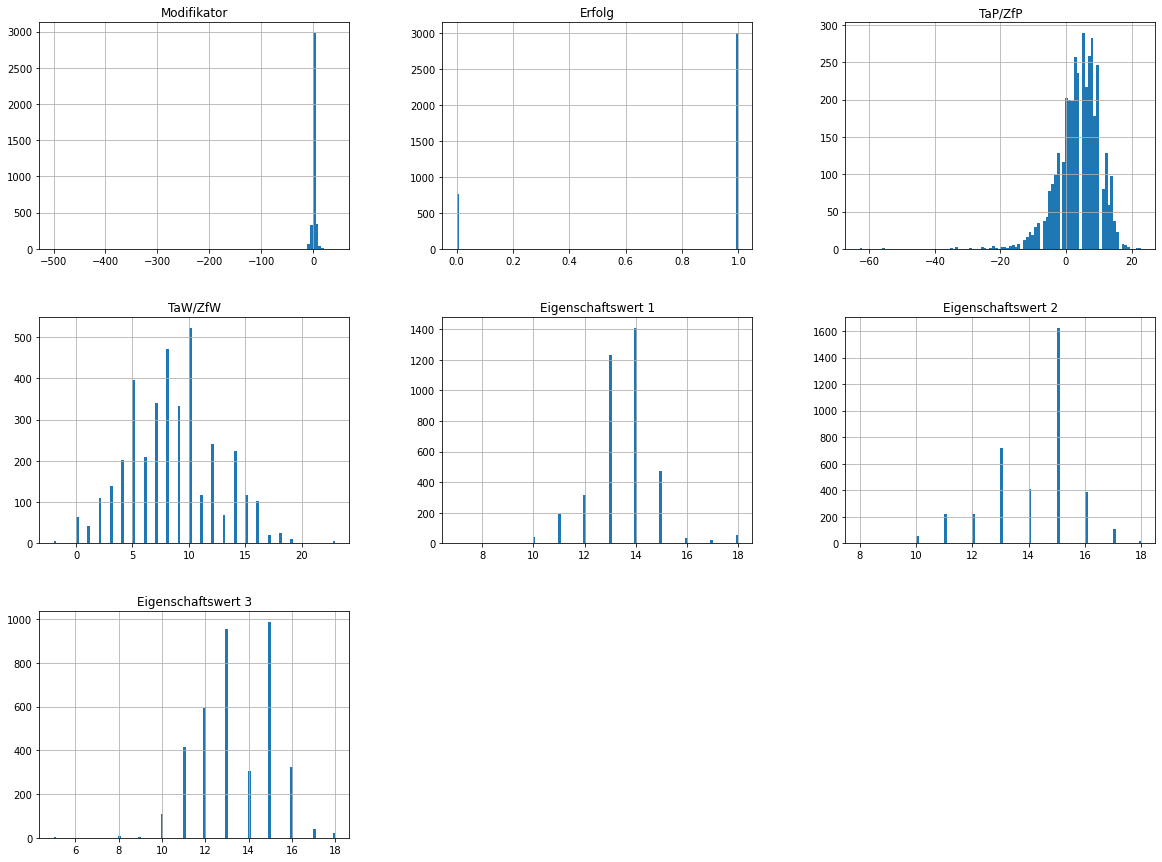

In [167]:
talents_data.hist(bins=100, figsize=(20,15))

In [168]:
talents_data.describe()

,Modifikator,Erfolg,TaP/ZfP,TaW/ZfW,Eigenschaftswert 1,Eigenschaftswert 2,Eigenschaftswert 3
count,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000
mean,0.540584,0.796817,3.948541,8.451989,13.522812,14.197613,13.439788
std,8.769207,0.402421,6.416763,3.919386,1.239286,1.530080,1.743337
min,-500.000000,0.000000,-63.000000,-2.000000,7.000000,8.000000,5.000000
25%,0.000000,1.000000,0.000000,5.000000,13.000000,13.000000,12.000000
50%,0.000000,1.000000,5.000000,8.000000,14.000000,15.000000,13.000000
75%,0.000000,1.000000,8.000000,10.000000,14.000000,15.000000,15.000000
max,43.000000,1.000000,23.000000,23.000000,18.000000,18.000000,18.000000


In [169]:
talents_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3770 entries, 0 to 3769
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Character           3770 non-null   object
 1   Category            3770 non-null   object
 2   Talent              3770 non-null   object
 3   Eigenschaft 1       3770 non-null   object
 4   Eigenschaft 2       3770 non-null   object
 5   Eigenschaft 3       3770 non-null   object
 6   Modifikator         3770 non-null   int64 
 7   Erfolg              3770 non-null   int64 
 8   TaP/ZfP             3770 non-null   int64 
 9   TaW/ZfW             3770 non-null   int64 
 10  Eigenschaftswert 1  3770 non-null   int64 
 11  Eigenschaftswert 2  3770 non-null   int64 
 12  Eigenschaftswert 3  3770 non-null   int64 
dtypes: int64(7), object(6)
memory usage: 383.0+ KB


<AxesSubplot:>

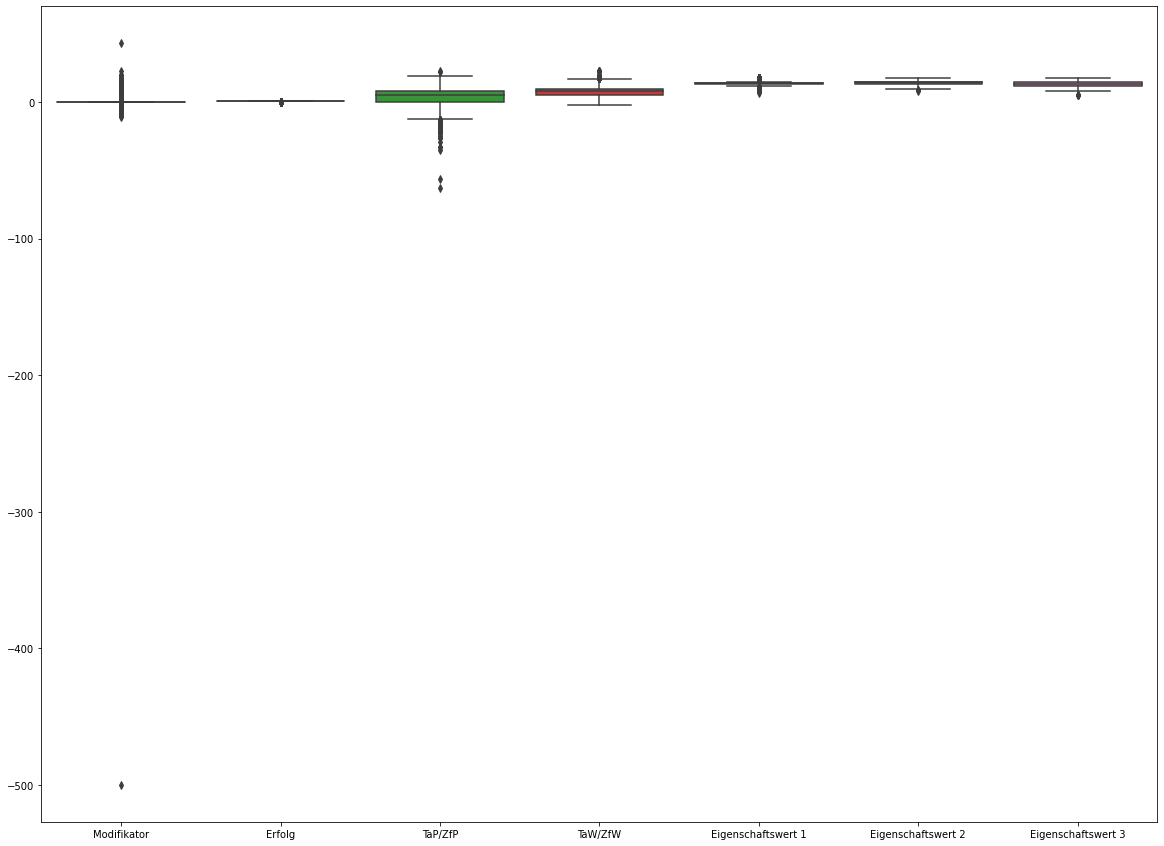

In [170]:
plt.figure(figsize=(20,15))
sns.boxplot(data=talents_data)

In [171]:
talents_data = talents_data[talents_data['Modifikator'] != -500]

<AxesSubplot:>

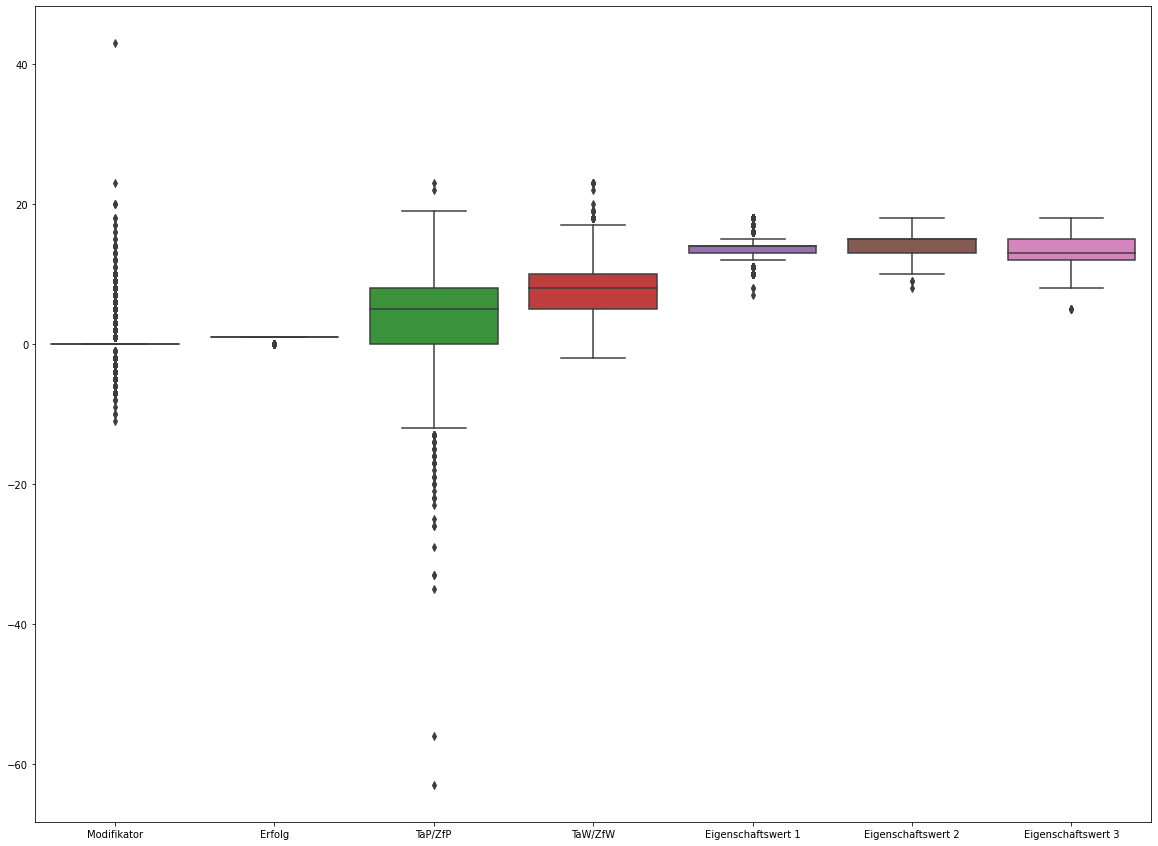

In [172]:
plt.figure(figsize=(20,15))
sns.boxplot(data=talents_data)

<AxesSubplot:>

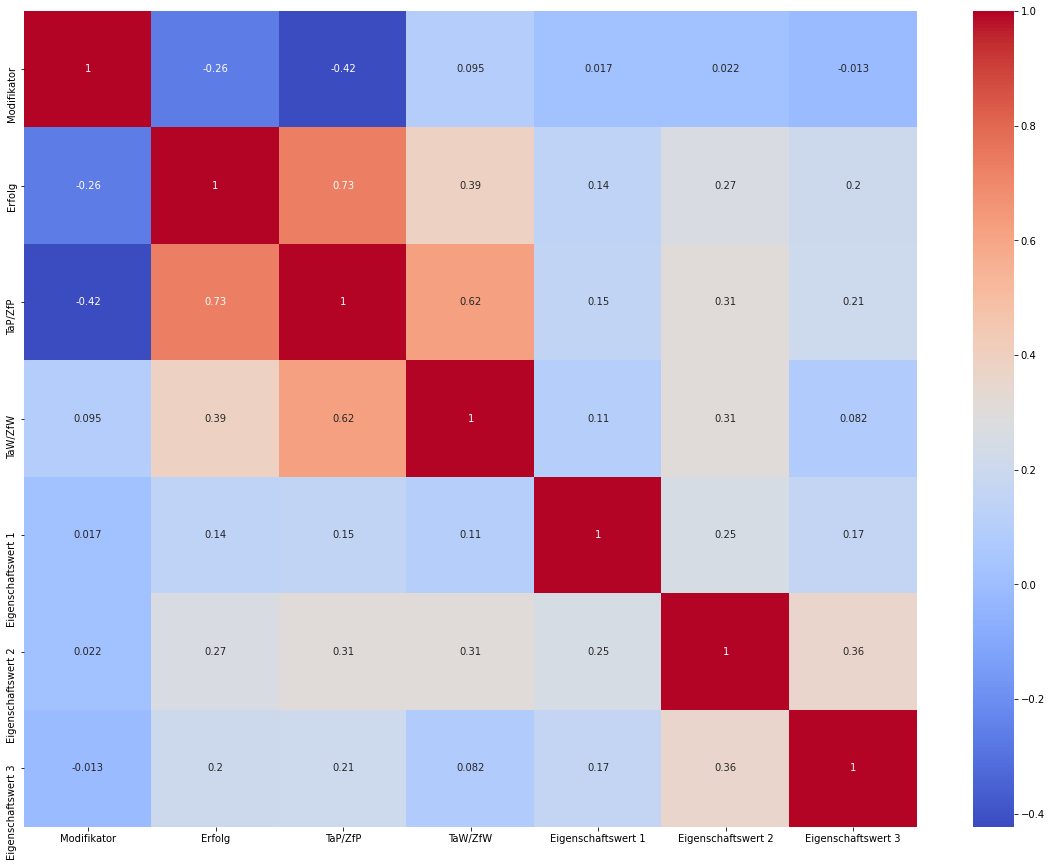

In [173]:
plt.figure(figsize=(20,15))
sns.heatmap(talents_data.corr(), annot=True, cmap='coolwarm')

In [174]:
talents_data = talents_data.join(pd.get_dummies(talents_data.Category)).drop(['Category'], axis=1)
talents_data = talents_data.join(pd.get_dummies(talents_data['Eigenschaft 1'], prefix='Eig1')).drop(['Eigenschaft 1'], axis=1)
talents_data = talents_data.join(pd.get_dummies(talents_data['Eigenschaft 2'], prefix='Eig2')).drop(['Eigenschaft 2'], axis=1)
talents_data = talents_data.join(pd.get_dummies(talents_data['Eigenschaft 3'], prefix='Eig3')).drop(['Eigenschaft 3'], axis=1)


In [175]:
talents_data

,Character,Talent,Modifikator,Erfolg,TaP/ZfP,TaW/ZfW,Eigenschaftswert 1,Eigenschaftswert 2,Eigenschaftswert 3,Gaben,...,Eig2_IN,Eig2_KL,Eig2_KO,Eig2_Ko,Eig3_CH,Eig3_FF,Eig3_GE,Eig3_IN,Eig3_KK,Eig3_KO
0,Hanzo Shimada,Fährtensuchen,0,1,4,8,14,15,15,0,...,1,0,0,0,0,0,0,1,0,0
1,Elanor Walham,Heilkunde Gift,0,0,-12,0,12,12,14,0,...,0,1,0,0,0,0,0,1,0,0
2,Elanor Walham,Heilkunde Gift,0,0,-1,0,12,12,14,0,...,0,1,0,0,0,0,0,1,0,0
3,Elanor Walham,Heilkunde Wunden,0,1,7,7,12,11,13,0,...,0,0,0,0,0,1,0,0,0,0
4,Hanzo Shimada,Geographie,0,0,-10,4,13,13,12,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,Playboy51,Fischen/Angeln,0,0,-3,5,16,12,12,0,...,0,0,0,0,0,0,0,0,1,0
3766,Playboy51,Magiekunde,0,1,3,8,13,13,16,0,...,0,1,0,0,0,0,0,1,0,0
3767,Playboy51,Sinnesschärfe,0,1,10,10,13,16,16,0,...,1,0,0,0,0,0,0,1,0,0
3768,Playboy51,Klettern,0,1,2,2,12,16,12,0,...,0,0,0,0,0,0,0,0,1,0


In [176]:
talents_data.corr()

,Modifikator,Erfolg,TaP/ZfP,TaW/ZfW,Eigenschaftswert 1,Eigenschaftswert 2,Eigenschaftswert 3,Gaben,Gesellschaft,Handwerk,...,Eig2_IN,Eig2_KL,Eig2_KO,Eig2_Ko,Eig3_CH,Eig3_FF,Eig3_GE,Eig3_IN,Eig3_KK,Eig3_KO
Modifikator,1.000000,-0.261236,-0.422176,0.094899,0.017158,0.021637,-0.013205,-0.011991,0.124249,0.029426,...,-0.051441,-0.002441,0.114404,0.036906,0.110988,-0.033143,-0.045699,-0.116381,0.098194,-0.022253
Erfolg,-0.261236,1.000000,0.732240,0.385040,0.139462,0.266039,0.202155,0.008780,-0.002619,-0.004652,...,0.147466,-0.060295,-0.142988,-0.025171,-0.018958,0.022768,0.029885,0.099872,-0.158574,0.044840
TaP/ZfP,-0.422176,0.732240,1.000000,0.618112,0.154853,0.305681,0.205959,-0.003922,0.013056,0.011182,...,0.182662,-0.101835,-0.163141,-0.046852,-0.010137,0.020139,0.017513,0.116409,-0.184649,0.061493
TaW/ZfW,0.094899,0.385040,0.618112,1.000000,0.105212,0.307523,0.081710,-0.051972,0.149363,0.096991,...,0.194681,-0.155644,-0.163900,-0.065104,0.119940,0.077168,-0.034346,0.004987,-0.192216,0.073564
Eigenschaftswert 1,0.017158,0.139462,0.154853,0.105212,1.000000,0.250386,0.165434,0.015604,-0.015734,-0.064929,...,-0.064993,0.013934,0.053173,-0.014722,0.015749,-0.059396,-0.054152,-0.026614,-0.031498,0.219648
Eigenschaftswert 2,0.021637,0.266039,0.305681,0.307523,0.250386,1.000000,0.356047,0.051381,0.235714,-0.210112,...,0.493408,-0.128758,-0.271038,-0.077605,0.220606,-0.116153,0.053551,0.157552,-0.332244,0.003964
Eigenschaftswert 3,-0.013205,0.202155,0.205959,0.081710,0.165434,0.356047,1.000000,0.080622,-0.263111,-0.085607,...,0.055861,0.008018,0.052486,0.018038,-0.334829,-0.173762,0.009050,0.414881,-0.015531,-0.039519
Gaben,-0.011991,0.008780,-0.003922,-0.051972,0.015604,0.051381,0.080622,1.000000,-0.033921,-0.027682,...,0.068108,-0.023900,-0.032764,-0.010035,-0.038133,-0.028432,-0.025481,0.115173,-0.044196,-0.021262
Gesellschaft,0.124249,-0.002619,0.013056,0.149363,-0.015734,0.235714,-0.263111,-0.033921,1.000000,-0.140623,...,0.341418,-0.121410,-0.166440,-0.050980,0.885628,-0.144432,-0.124169,-0.294521,-0.224515,-0.108013
Handwerk,0.029426,-0.004652,0.011182,0.096991,-0.064929,-0.210112,-0.085607,-0.027682,-0.140623,1.000000,...,-0.278623,0.014340,0.048689,-0.041603,-0.107961,0.624803,-0.105634,-0.214450,-0.005868,-0.077399


<AxesSubplot:>

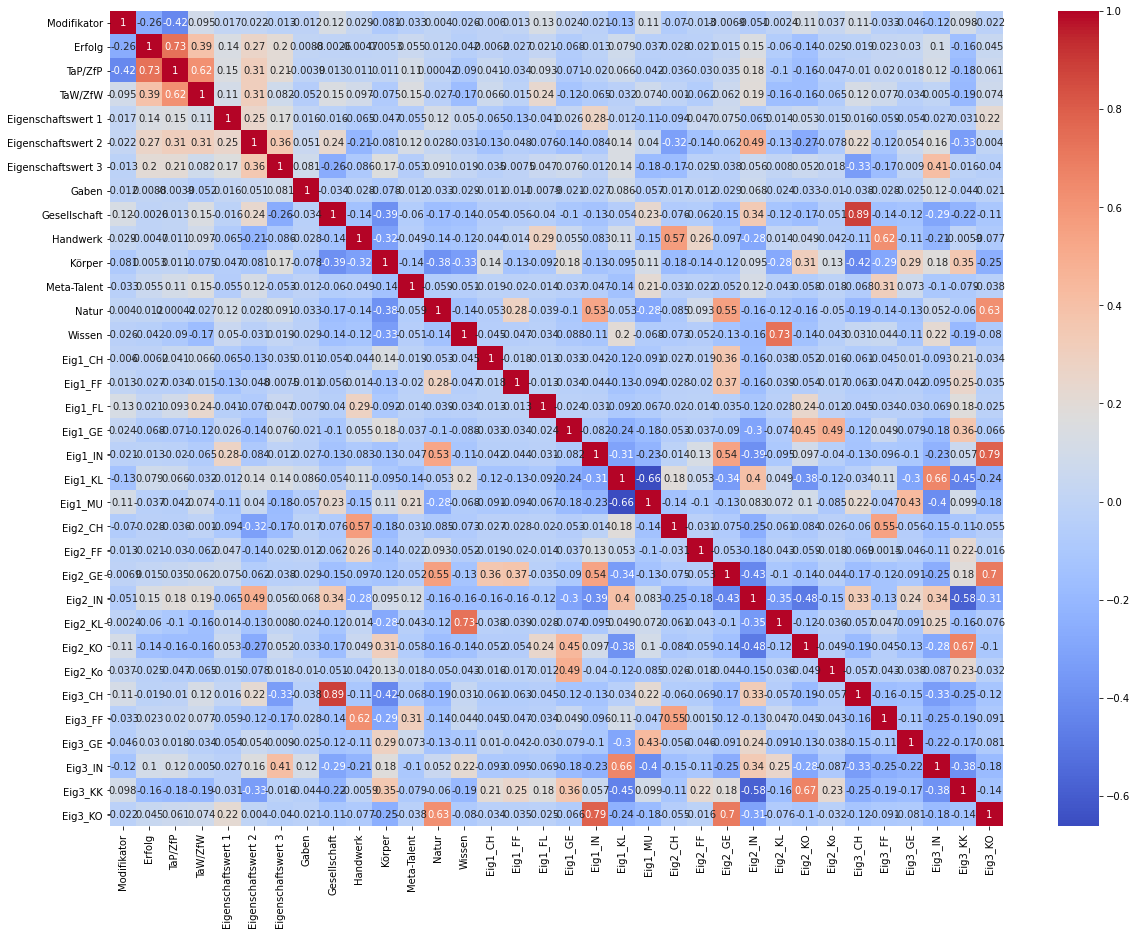

In [177]:
plt.figure(figsize=(20,15))
sns.heatmap(talents_data.corr(), annot=True, cmap='coolwarm')

In [178]:
talents_data

,Character,Talent,Modifikator,Erfolg,TaP/ZfP,TaW/ZfW,Eigenschaftswert 1,Eigenschaftswert 2,Eigenschaftswert 3,Gaben,...,Eig2_IN,Eig2_KL,Eig2_KO,Eig2_Ko,Eig3_CH,Eig3_FF,Eig3_GE,Eig3_IN,Eig3_KK,Eig3_KO
0,Hanzo Shimada,Fährtensuchen,0,1,4,8,14,15,15,0,...,1,0,0,0,0,0,0,1,0,0
1,Elanor Walham,Heilkunde Gift,0,0,-12,0,12,12,14,0,...,0,1,0,0,0,0,0,1,0,0
2,Elanor Walham,Heilkunde Gift,0,0,-1,0,12,12,14,0,...,0,1,0,0,0,0,0,1,0,0
3,Elanor Walham,Heilkunde Wunden,0,1,7,7,12,11,13,0,...,0,0,0,0,0,1,0,0,0,0
4,Hanzo Shimada,Geographie,0,0,-10,4,13,13,12,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,Playboy51,Fischen/Angeln,0,0,-3,5,16,12,12,0,...,0,0,0,0,0,0,0,0,1,0
3766,Playboy51,Magiekunde,0,1,3,8,13,13,16,0,...,0,1,0,0,0,0,0,1,0,0
3767,Playboy51,Sinnesschärfe,0,1,10,10,13,16,16,0,...,1,0,0,0,0,0,0,1,0,0
3768,Playboy51,Klettern,0,1,2,2,12,16,12,0,...,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:>

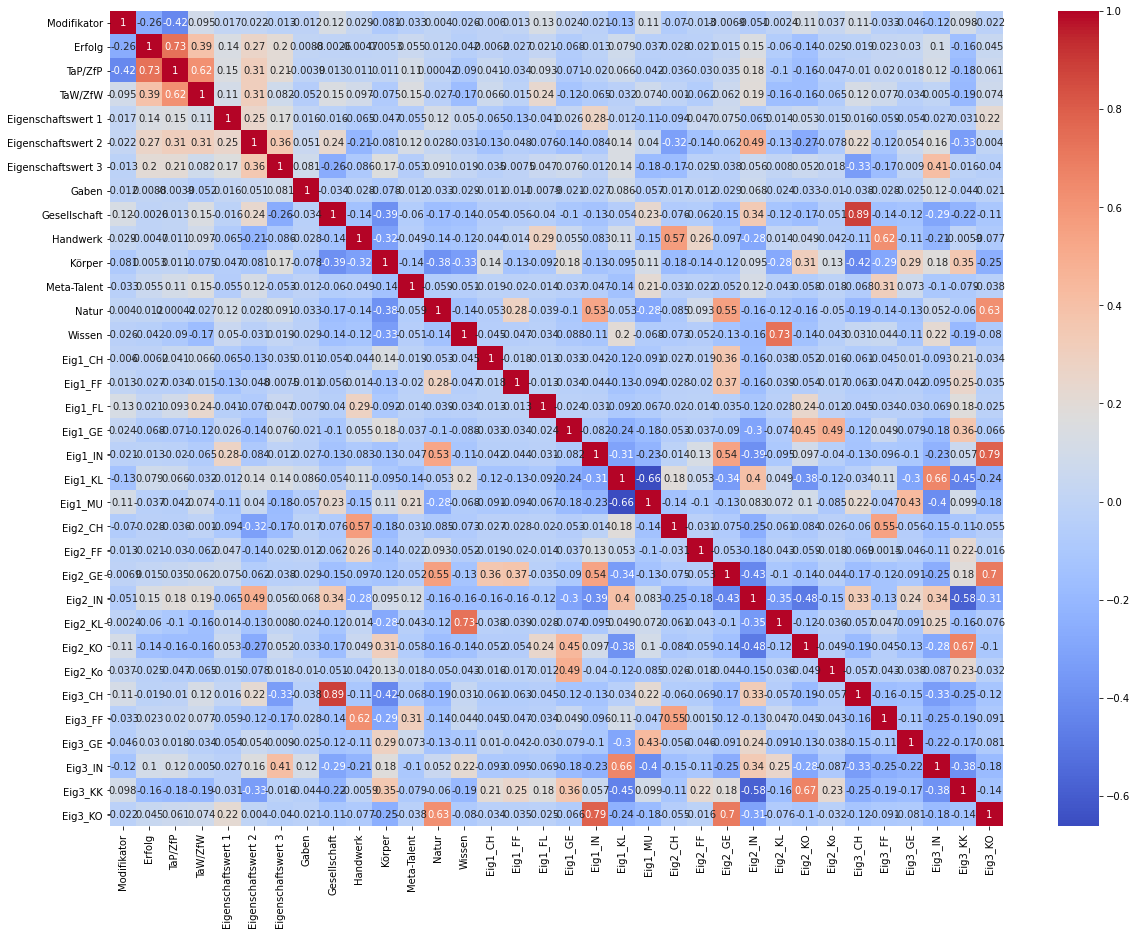

In [179]:
plt.figure(figsize=(20,15))
sns.heatmap(talents_data.corr(), annot=True, cmap='coolwarm')

In [180]:
talents_data = talents_data.drop(['Erfolg'], axis=1)
talents_data = talents_data.drop(['Character'], axis=1)
talents_data = talents_data.drop(['Talent'], axis=1)

In [181]:
from sklearn.model_selection import train_test_split

X = talents_data.drop(['TaP/ZfP'], axis=1)
y = talents_data['TaP/ZfP']

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [183]:
train_data = X_train.join(y_train)

In [184]:
train_data

,Modifikator,TaW/ZfW,Eigenschaftswert 1,Eigenschaftswert 2,Eigenschaftswert 3,Gaben,Gesellschaft,Handwerk,Körper,Meta-Talent,...,Eig2_KL,Eig2_KO,Eig2_Ko,Eig3_CH,Eig3_FF,Eig3_GE,Eig3_IN,Eig3_KK,Eig3_KO,TaP/ZfP
1872,0,4,15,15,16,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,4
1103,0,12,14,15,13,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3762,0,10,16,16,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,8
468,0,9,14,15,13,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,9
1210,0,0,15,13,11,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,0,5,13,12,12,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,-3
1157,0,10,14,15,15,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,6
57,0,8,12,14,15,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2469,0,15,13,16,13,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,11


In [185]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['TaP/ZfP'], axis=1), train_data['TaP/ZfP']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [186]:
test_data = X_test.join(y_test)

In [187]:
X_test, y_test = test_data.drop(['TaP/ZfP'], axis=1), test_data['TaP/ZfP']

In [188]:
X_test_s = scaler.transform(X_test)

In [189]:
train_data

,Modifikator,TaW/ZfW,Eigenschaftswert 1,Eigenschaftswert 2,Eigenschaftswert 3,Gaben,Gesellschaft,Handwerk,Körper,Meta-Talent,...,Eig2_KL,Eig2_KO,Eig2_Ko,Eig3_CH,Eig3_FF,Eig3_GE,Eig3_IN,Eig3_KK,Eig3_KO,TaP/ZfP
1872,0,4,15,15,16,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,4
1103,0,12,14,15,13,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3762,0,10,16,16,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,8
468,0,9,14,15,13,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,9
1210,0,0,15,13,11,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,0,5,13,12,12,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,-3
1157,0,10,14,15,15,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,6
57,0,8,12,14,15,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2469,0,15,13,16,13,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,11


In [190]:
reg.score(X_test_s, y_test)

0.6441707955255191

In [192]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3015 entries, 1872 to 2933
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Modifikator         3015 non-null   int64
 1   TaW/ZfW             3015 non-null   int64
 2   Eigenschaftswert 1  3015 non-null   int64
 3   Eigenschaftswert 2  3015 non-null   int64
 4   Eigenschaftswert 3  3015 non-null   int64
 5   Gaben               3015 non-null   uint8
 6   Gesellschaft        3015 non-null   uint8
 7   Handwerk            3015 non-null   uint8
 8   Körper              3015 non-null   uint8
 9   Meta-Talent         3015 non-null   uint8
 10  Natur               3015 non-null   uint8
 11  Wissen              3015 non-null   uint8
 12  Eig1_CH             3015 non-null   uint8
 13  Eig1_FF             3015 non-null   uint8
 14  Eig1_FL             3015 non-null   uint8
 15  Eig1_GE             3015 non-null   uint8
 16  Eig1_IN             3015 non-null   uin

In [206]:
# Sample DataFrame (with an index for a single row)
df = pd.DataFrame({
    'Modifikator': [0],
    'TaW/ZfW': [9],
    'Eigenschaftswert 1': [14],
    'Eigenschaftswert 2': [16],
    'Eigenschaftswert 3': [16],
    'Category': ["Körper"],
    'Eigenschaft 1': ["KL"],
    'Eigenschaft 2': ["IN"],
    'Eigenschaft 3': ["IN"]
}, index=[0])  # The index is set to [0] for a single row

# Convert categories to dummies
df = df.join(pd.get_dummies(df['Category'])).drop(['Category'], axis=1)
df = df.join(pd.get_dummies(df['Eigenschaft 1'], prefix='Eig1')).drop(['Eigenschaft 1'], axis=1)
df = df.join(pd.get_dummies(df['Eigenschaft 2'], prefix='Eig2')).drop(['Eigenschaft 2'], axis=1)
df = df.join(pd.get_dummies(df['Eigenschaft 3'], prefix='Eig3')).drop(['Eigenschaft 3'], axis=1)

# Define the list of all expected column names based on your trained model
expected_columns = [
    'Modifikator', 'TaW/ZfW', 'Eigenschaftswert 1', 'Eigenschaftswert 2', 'Eigenschaftswert 3',
    'Gaben', 'Gesellschaft', 'Handwerk', 'Körper', 'Meta-Talent', 'Natur', 'Wissen',
    'Eig1_CH', 'Eig1_FF', 'Eig1_FL', 'Eig1_GE', 'Eig1_IN', 'Eig1_KL', 'Eig1_MU',
    'Eig2_CH', 'Eig2_FF', 'Eig2_GE', 'Eig2_IN', 'Eig2_KL', 'Eig2_KO', 'Eig2_Ko',
    'Eig3_CH', 'Eig3_FF', 'Eig3_GE', 'Eig3_IN', 'Eig3_KK', 'Eig3_KO'
]

# Add missing columns with default value of 0
for col in expected_columns:
    if col not in df.columns:
        df[col] = 0

# Scale the numerical features
scaler = StandardScaler()
df_s = scaler.fit_transform(df)

df_s

# Predict the outcome using your model
predicted_outcome = reg.predict(df_s)


In [207]:
predicted_outcome

array([3.93390366])